In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Carregando o DF

In [35]:
df = pd.read_csv('dados_tratados_ana_carnaubal_completo2.csv', sep=';', encoding='utf-8')
df['data'] = pd.to_datetime(df['data'], errors='coerce')
df = pd.DataFrame(df)


# Definindo as variáveis

In [36]:
x = df.drop(columns=['data', 'volume','variacao_volume'])
y = df['variacao_volume']

# Dividindo os dados em treino e teste

In [37]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=42)

# Modelo -> Random Florest

In [38]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [39]:
model.fit(x_treino, y_treino)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [47]:
prevision = model.predict(x_teste)
r2 = r2_score(y_teste, prevision)
mae = mean_absolute_error(y_teste, prevision)

In [48]:
print(f'R²: {r2}')
print(f'MAE: {mae}')

R²: -0.36154299549093705
MAE: 0.013113494544665006


--- Análise da Variável Alvo (y) ---
count    13052.000000
mean        -0.002687
std          0.161442
min        -15.990000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.540000
Name: variacao_volume, dtype: float64

--- Histograma da Variável Alvo ---


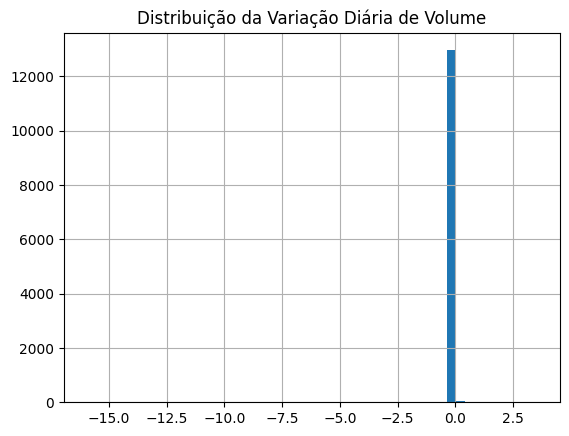

In [49]:
print("--- Análise da Variável Alvo (y) ---")
print(y.describe())

print("\n--- Histograma da Variável Alvo ---")
y.hist(bins=50)
plt.title('Distribuição da Variação Diária de Volume')
plt.show()